In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.neighbors
import seaborn as sns


In [4]:
df = pd.read_csv(r"C:\Users\sasankvz\Desktop\jp nb\hw3\ted_main/ted_main.csv")
df.head()


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [12]:
duration = df['duration']
X = duration.values[:, np.newaxis]

kde10 = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=10)
kde10.fit(X)
kde20 = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=20)
kde20.fit(X)
kde50 = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=50)
kde50.fit(X)
kde100 = sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=100)
kde100.fit(X)


KernelDensity(bandwidth=100)

Text(0.5, 1.0, 'KDE Estimates by Bandwidth (Gaussian)')

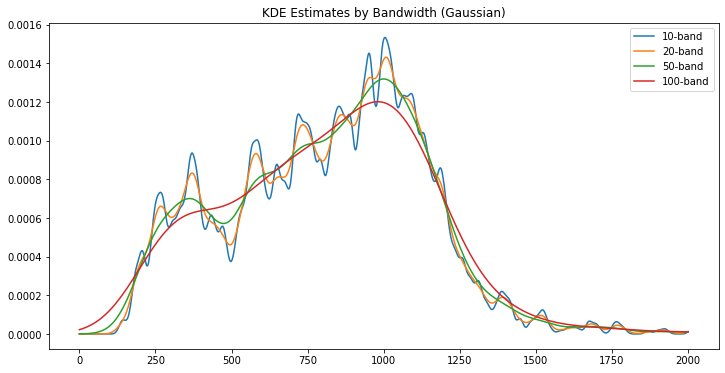

In [15]:
n2000 = np.array(list(range(0, 2001)))[:, np.newaxis]

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(n2000, np.exp(kde10.score_samples(n2000)), label='10-band')
ax.plot(n2000, np.exp(kde20.score_samples(n2000)), label='20-band')
ax.plot(n2000, np.exp(kde50.score_samples(n2000)), label='50-band')
ax.plot(n2000, np.exp(kde100.score_samples(n2000)), label='100-band')
ax.legend()
ax.set_title("KDE Estimates by Bandwidth (Gaussian)")